![Fort Valley State University logo](https://www.fvsu.edu/content/userfiles/images/2019/09/FVSU-Primary-FullColor-RGB-glow2-1024x445.png)


# **Welcome to the MS-CC / FVSU Hackathon**
This notebook introduces **linear regression** using **Python** as a practical tool for working with real agricultural data. You will use Python to load, visualize, and model relationships in open datasets from **Our World in Data**, focusing on how fertilizer use and time relate to crop yield. Linear regression serves as a foundation for many more advanced modeling approaches, including **machine learning**. By the end of this workflow, you will have the conceptual and computational building blocks needed to understand how more complex data-driven models are constructed and evaluated.

## **Introduction to Linear Regression**

Linear regression is a statistical method used to describe and quantify the relationship between one or more predictor variables and a response variable. It works by fitting a straight line that best represents how the response changes as the predictors change. The slope of the line indicates the direction and strength of the relationship, while model metrics such as R² describe how well the model explains the observed data. Linear regression is widely used in agriculture, economics, and the natural sciences to identify patterns and support data-informed decision making.

This notebook introduces linear regression using open agriculture data from [Our World in Data](https://ourworldindata.org/grapher/cereal-crop-yield-vs-fertilizer-application). We explore how nitrogen fertilizer application and year are related to cereal crop yields, using real, global observations. Through this workflow, you will learn how to build, visualize, and interpret regression models, and how to think critically about what these models can — and cannot — tell us about agricultural systems.


### 📦 **Importing the Python libraries we will use**
In this notebook, we use a small set of Python libraries that are commonly used for data analysis and modeling. Each library provides specific tools that help us work efficiently with data and build regression models.

**pandas** is used to store and manipulate tabular data, **matplotlib** is used to create visualizations, and **scikit-learn** provides tools for building and evaluating regression models. The **requests** library allows us to download data and metadata directly from the web.

Importing these libraries at the start of the notebook ensures that all the tools we need are available for the analysis.

In [ ]:
# Import python libraries
import pandas as pd # work with tabular data
import matplotlib.pyplot as plt # make plots
from sklearn.linear_model import LinearRegression # make regression model
from sklearn.metrics import mean_squared_error # calculate error terms
import requests # to request data

### 📥 **Loading open agricultural data from _Our World in Data_**
In this step, we load open, publicly available data from **Our World in Data (OWID)**, a platform that curates and publishes research-quality datasets on global issues, including agriculture. The dataset combines information on **cereal crop yields** and **fertilizer application rates** across **countries and years**, making it well suited for exploring relationships using linear regression.

The code uses the Python library **pandas** to download the dataset directly from the web, meaning no files need to be stored locally.

We also fetch a separate **metadata:** file, which contains important contextual information such as variable definitions, units, and data sources. Accessing both the data and metadata helps ensure that our analysis is transparent and that we correctly interpret what each variable represents.

Displaying the first few rows of the dataset allows us to inspect its structure, confirm that the data loaded correctly, and begin thinking about which variables might be useful for modeling crop yield.

In [ ]:
# Copy the data download code (Python using Pandas) from OWID and paste it here
# https://ourworldindata.org/grapher/cereal-crop-yield-vs-fertilizer-application


# Fetch the data
df = pd.read_csv("https://ourworldindata.org/grapher/"
                 "cereal-crop-yield-vs-fertilizer-application.csv"
                 "?v=1&csvType=full&useColumnShortNames=true",
                 storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/"
                        "cereal-crop-yield-vs-fertilizer-application.metadata.json"
                        "?v=1&csvType=full&useColumnShortNames=true").json()

# Display first 5 rows of data
df

,Entity,Code,Year,cereals__00001717__yield__005412__tonnes_per_hectare,nutrient_nitrogen_n__total__00003102__use_per_area_of_cropland__005159__kilograms_per_hectare,owid_region
0,Afghanistan,AFG,1961,1.1151,0.13,NaN
1,Afghanistan,AFG,1962,1.0790,0.13,NaN
2,Afghanistan,AFG,1963,0.9858,0.13,NaN
3,Afghanistan,AFG,1964,1.0828,0.13,NaN
4,Afghanistan,AFG,1965,1.0989,0.13,NaN
...,...,...,...,...,...,...
14093,Zimbabwe,ZWE,2019,0.7496,15.72,NaN
14094,Zimbabwe,ZWE,2020,1.1494,11.99,NaN
14095,Zimbabwe,ZWE,2021,1.5455,12.53,NaN
14096,Zimbabwe,ZWE,2022,0.9569,12.37,NaN


In [ ]:
# Display metadata
metadata

{'chart': {'title': 'Cereal yield vs. fertilizer use',
  'subtitle': 'Yields are measured in tonnes per hectare. Fertilizer use is measured in kilograms of nitrogenous fertilizer applied per hectare of cropland.',
  'citation': 'Food and Agriculture Organization of the United Nations (2025)',
  'originalChartUrl': 'https://ourworldindata.org/grapher/cereal-crop-yield-vs-fertilizer-application?v=1&csvType=full&useColumnShortNames=true',
  'selection': []},
 'columns': {'cereals__00001717__yield__005412__tonnes_per_hectare': {'titleShort': 'Cereal yields',
   'titleLong': 'Cereal yields - UN FAO',
   'descriptionShort': 'Measured in tonnes per hectare.',
   'descriptionKey': ['Cereals include wheat, rice, maize, barley, oats, rye, millet, sorghum, buckwheat, and mixed grains.'],
   'shortUnit': 't/ha',
   'unit': 'tonnes per hectare',
   'timespan': '1961-2023',
   'type': 'Numeric',
   'owidVariableId': 1018292,
   'shortName': 'cereals__00001717__yield__005412__tonnes_per_hectare',
   

### ✏️ **Renaming variables for clarity**
Real-world datasets often use long, machine-generated column names that can be difficult to read and work with. In this step, we rename the yield and nitrogen variables using shorter, more descriptive names that make the analysis easier to follow. This does not change the data itself—it simply improves readability and reduces the chance of mistakes later in the notebook. Displaying the first few rows afterward lets us confirm that the renaming worked as expected.

In [ ]:
# Rename long columns for readability
df = df.rename(columns={
    "cereals__00001717__yield__005412__tonnes_per_hectare": "yield_t_per_ha",
    "nutrient_nitrogen_n__total__00003102__use_per_area_of_cropland__005159__kilograms_per_hectare": "nitrogen_kg_per_ha"
})

# Display first 5 rows of data
df.head()

,Entity,Code,Year,yield_t_per_ha,nitrogen_kg_per_ha,owid_region
0,Afghanistan,AFG,1961,1.1151,0.13,NaN
1,Afghanistan,AFG,1962,1.0790,0.13,NaN
2,Afghanistan,AFG,1963,0.9858,0.13,NaN
3,Afghanistan,AFG,1964,1.0828,0.13,NaN
4,Afghanistan,AFG,1965,1.0989,0.13,NaN


## **Time to make a prediction!**
Before running the next cell, predict what you think the relationship between **cereal yield** and **nutrient application** will look like.

**Ask yourself:** Which variable should go on which axis (x,y)?

Sketch the graph on a whiteboard or sheet of paper. You can also write your prediction with text in the space below (**Hint:** You can double click in this text/markdown cell to add your answer in the space below)

**Type your answer here:**

<Axes: title={'center': 'Cereal yield vs. fertilizer use 1961-2022'}, xlabel='nitrogen_kg_per_ha', ylabel='yield_t_per_ha'>

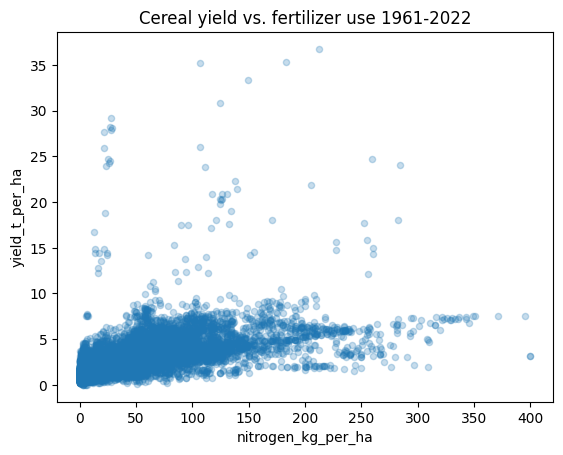

In [ ]:
# Plot yield vs. nitrogen application for all countries and years
df.plot(x='nitrogen_kg_per_ha',
            y='yield_t_per_ha',
            kind='scatter',
            alpha=0.25,
            title='Cereal yield vs. fertilizer use 1961-2022')

### 🌎 **Focusing on a single agricultural system**

Before building a regression model, we narrow the dataset to a single country, in this case the United States. Agricultural systems vary widely across countries due to differences in climate, soils, technology, and management practices. Combining multiple countries in a single regression can obscure meaningful relationships and make interpretation difficult.

By selecting one country, we ensure that the observations are more comparable and that the model reflects changes within a single agricultural system over time. We then keep only the variables needed for this analysis—year, cereal yield, and nitrogen application rate—and remove rows with missing values. This prepares a clean, focused dataset that is appropriate for regression analysis.

In [ ]:
# Select a single country to avoid confusion between diff ag systems
usa_df = df[df["Entity"] == "United States"]

usa_df = usa_df[[
    "Year",
    "yield_t_per_ha",
    "nitrogen_kg_per_ha"
]].dropna()

usa_df


,Year,yield_t_per_ha,nitrogen_kg_per_ha
13208,1961,2.522300,12.96
13209,1962,2.683100,15.18
13210,1963,2.800600,16.85
13211,1964,2.639300,18.34
13212,1965,3.040800,20.69
...,...,...,...
13265,2018,8.196000,59.72
13266,2019,8.005501,59.49
13267,2020,8.144701,60.76
13268,2021,8.246201,60.16


### 📊 **Exploring the relationship between fertilizer and yield**
Before fitting a regression model, it is important to ***visualize*** the data. This scatter plot shows the relationship between nitrogen fertilizer application and cereal crop yield in the United States over time. Each point represents one year of data.

Creating this plot helps us assess whether a linear relationship is reasonable and whether there are patterns, clusters, or outliers in the data. If the points show a general upward or downward trend, a linear regression may be appropriate; if the pattern is highly curved or scattered, a simple linear model may be less informative. Visualization also reminds us that real agricultural data include variability due to weather, management, and other factors not captured in the model.

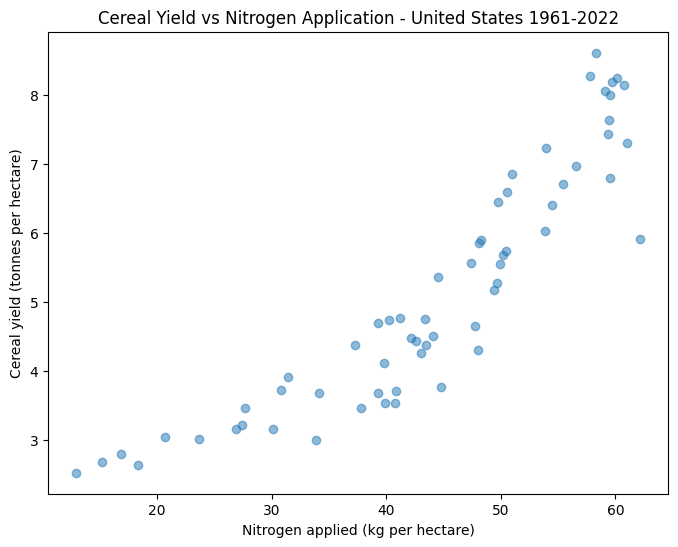

In [ ]:
# Plot USA data (yield vs. nitrate fertilizer application)

plt.figure(figsize=(8, 6))
plt.scatter(
    usa_df["nitrogen_kg_per_ha"],
    usa_df["yield_t_per_ha"],
    alpha=0.5
)

plt.xlabel("Nitrogen applied (kg per hectare)")
plt.ylabel("Cereal yield (tonnes per hectare)")
plt.title("Cereal Yield vs Nitrogen Application - United States 1961-2022")
plt.show()


### 📈 **Building and interpreting a simple linear regression model**
In this step, we fit a simple linear regression model to quantify the relationship between nitrogen fertilizer application and cereal yield in the United States. The predictor variable (X) is nitrogen applied per hectare, and the response variable (y) is cereal yield in tonnes per hectare. The model estimates a straight line that best fits the observed data by minimizing the overall prediction error.

Once the model is fit, we examine three key outputs. The slope describes how much yield is expected to change for each additional kilogram of nitrogen applied per hectare. The intercept represents the model’s predicted yield when nitrogen application is zero, which may not be realistic but is necessary for defining the line. The R² value indicates how much of the variation in yield can be explained by nitrogen alone, helping us assess how informative this single-variable model is.

In [ ]:
# Create linear regression model
X = usa_df[["nitrogen_kg_per_ha"]]
y = usa_df["yield_t_per_ha"]

model = LinearRegression()
model.fit(X, y)

print("Slope (How much does yield change with each additional kg of N per hectare?):", model.coef_[0])
print("Intercept (What would yield be if 0 kg N applied per hectare?):", model.intercept_)
print("R-squared (How much of yield variation is explained by N?):", model.score(X, y))

Slope (How much does yield change with each additional kg of N per hectare?): 0.12352235702571225
Intercept (What would yield be if 0 kg N applied per hectare?): -0.26816580347894536
R-squared (How much of yield variation is explained by N?): 0.8103859151284059


### 📐 **Calculating R² to evaluate model performance**
Here we explicitly calculate the R² value for the regression model. R² measures how well the regression line explains the observed data by quantifying the fraction of variation in yield that can be explained by nitrogen application alone.

Computing R² separately makes it clear that this value is a summary of model performance, not just an abstract statistic. Later, we will use this same value to annotate plots and to compare models with different predictors, helping us evaluate whether adding more information improves our understanding of crop yield patterns.

In [ ]:
# Calculate R-squared (to be added to the plot)
r2 = model.score(X, y)
r2

0.8103859151284059

### 🔍 **Interpreting R² for the nitrogen-only model**

The R² value represents the proportion of variation in cereal yield that is explained by nitrogen fertilizer application alone. A higher R² indicates that the regression line captures a larger share of the observed variability in yield, while a lower R² suggests that other factors are also important. Even when R² is relatively high, it does not imply causation—only that nitrogen and yield tend to vary together in this dataset. This result motivates exploring additional predictors, such as year, to better understand what drives yield changes over time.

### 📉 **Visualizing the regression model and its fit**

This plot combines the observed data with the regression line estimated by the model. Each point represents an observed year of data, while the red line shows the model’s best estimate of how yield changes with nitrogen application on average.

Displaying the regression line alongside the data helps us see how well the model captures the overall trend and where it falls short. The R² value is added directly to the plot to summarize model performance in a single number, allowing us to connect the visual fit of the line with a quantitative measure of how much variation in yield is explained by nitrogen alone.

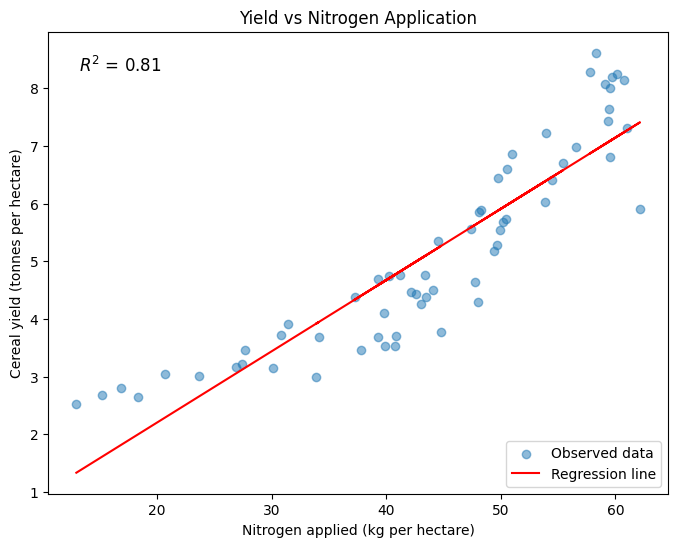

In [ ]:
# Plot regression line and scatter

plt.figure(figsize=(8, 6))

# Scatter plot of observed data
plt.scatter(X, y, label="Observed data", alpha=0.5)

# Regression line
plt.plot(X, model.predict(X), color="red", label="Regression line")

# Axis labels
plt.xlabel("Nitrogen applied (kg per hectare)")
plt.ylabel("Cereal yield (tonnes per hectare)")
plt.title("Yield vs Nitrogen Application")

# Add R-squared text to the plot
plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top"
)

plt.legend()
plt.show()


### 🎨 **Adding time as visual context**

In this plot, we revisit the relationship between nitrogen application and yield, but now we color each data point by year using a continuous color scale. This allows us to visually incorporate time into the analysis without yet changing the regression model itself.

Coloring points by year helps reveal whether the nitrogen–yield relationship has shifted over time. If newer years tend to cluster at higher yields or different nitrogen levels than earlier years, this suggests that long-term changes—such as improved crop varieties, management practices, or technology—may be influencing yield alongside fertilizer use. This visual pattern motivates the next step: formally adding year as an additional predictor in the regression model.

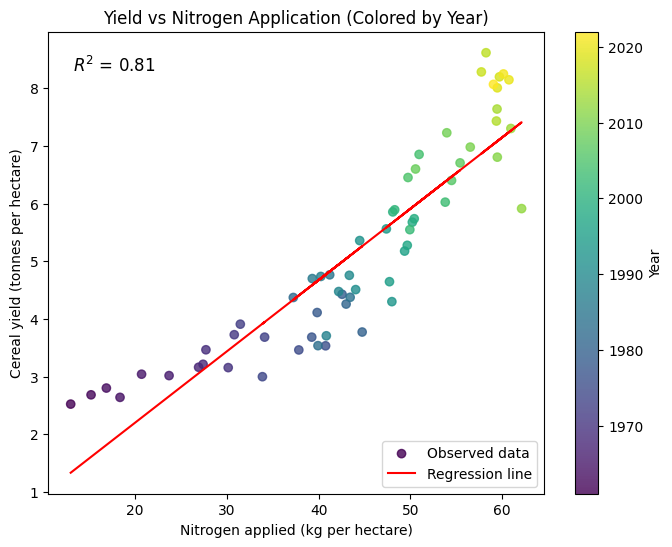

In [ ]:
# Plot regression line and scatter (colored by year)

plt.figure(figsize=(8, 6))

# Scatter plot colored by year
sc = plt.scatter(
    X,
    y,
    c=usa_df["Year"],
    cmap="viridis",
    alpha=0.8,
    label="Observed data"
)

# Regression line
plt.plot(
    X,
    model.predict(X),
    color="red",
    label="Regression line"
)

# Labels and title
plt.xlabel("Nitrogen applied (kg per hectare)")
plt.ylabel("Cereal yield (tonnes per hectare)")
plt.title("Yield vs Nitrogen Application (Colored by Year)")

# Add R-squared annotation
plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top"
)

# Colorbar for year
cbar = plt.colorbar(sc)
cbar.set_label("Year")

plt.legend()
plt.show()


## **Does year seem to be an important factor when it comes to yield?**
We can explore this visually using the plot above and by adding Year as a second predictor to our regression model. Let's try that in the cell below.

<Axes: title={'center': 'Cereal yield vs. Year (USA) 1961-2022'}, xlabel='Year', ylabel='yield_t_per_ha'>

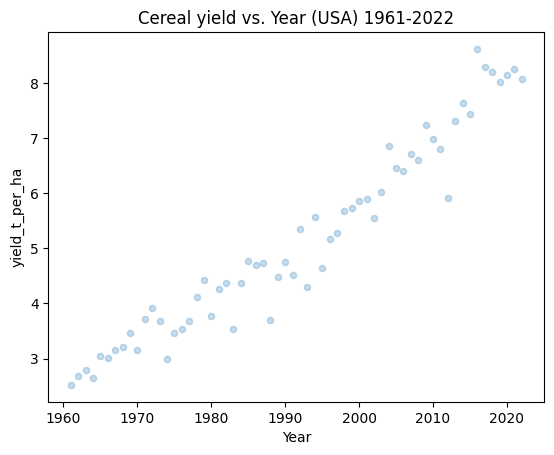

In [ ]:
# Plot yield vs. year for the USA
usa_df.plot(x='Year',
            y='yield_t_per_ha',
            kind='scatter',
            alpha=0.25,
            title='Cereal yield vs. Year (USA) 1961-2022')

In [ ]:
# Define predictor variables
X_multi = usa_df[[
    "nitrogen_kg_per_ha",
    "Year"
]]

# Define response variable
y = usa_df["yield_t_per_ha"]

In [ ]:
# Build regression model
model_multi = LinearRegression()
model_multi.fit(X_multi, y)

LinearRegression()

In [ ]:
# Print the intercept (B0) for the multiple regression model
print("The coefficient of the multiple regression model (Yield ~ Nitrate + Year) is:", model_multi.intercept_)

The coefficient of the multiple regression model (Yield ~ Nitrate + Year) is: -231.32287255314833


In [ ]:
# Calculate coefficients
coef_df = pd.DataFrame({
    "Predictor": X_multi.columns,
    "Coefficient": model_multi.coef_
})

coef_df

,Predictor,Coefficient
0,nitrogen_kg_per_ha,-0.038575
1,Year,0.119599


In [ ]:
r2_simple = model.score(X, y)
r2_multi = model_multi.score(X_multi, y)

print("R² (Nitrogen only):", round(r2_simple, 3))
print("R² (Nitrogen + Year):", round(r2_multi, 3))


R² (Nitrogen only): 0.81
R² (Nitrogen + Year): 0.943


## **Reflection Question**
Which model does a better job of explaining the variation in yield? Defend your answer.

### **Look at predicted vs. observed for both models (with and without year)**

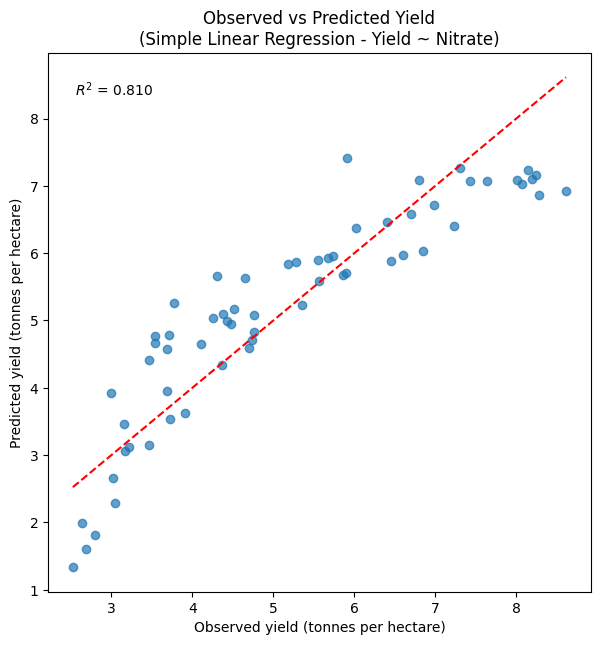

In [ ]:
# Predicted vs. Observed (without Year)
plt.figure(figsize=(7, 7))

plt.scatter(
    y,
    model.predict(X),
    alpha=0.7
)

plt.plot(
    [y.min(), y.max()],
    [y.min(), y.max()],
    color="red",
    linestyle="--"
)

plt.xlabel("Observed yield (tonnes per hectare)")
plt.ylabel("Predicted yield (tonnes per hectare)")
plt.title("Observed vs Predicted Yield\n(Simple Linear Regression - Yield ~ Nitrate)")

plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,
    verticalalignment="top"
)

plt.show()


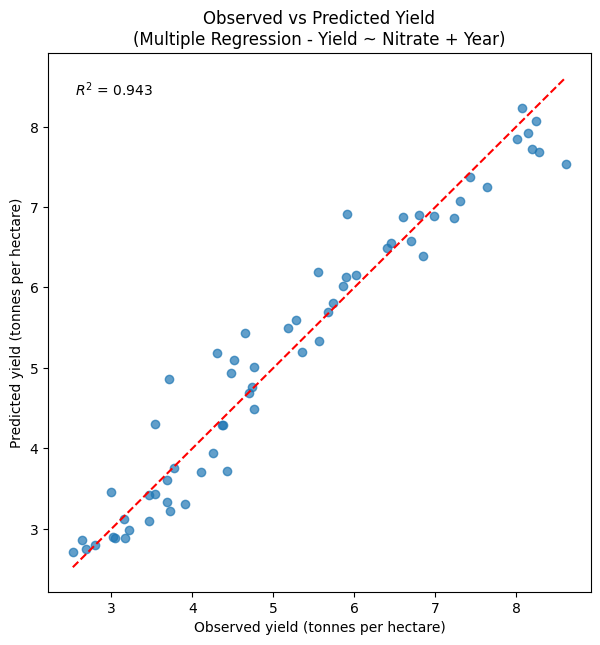

In [ ]:
# Predicted vs. Observed (with Year)
plt.figure(figsize=(7, 7))

plt.scatter(
    y,
    model_multi.predict(X_multi),
    alpha=0.7
)

plt.plot(
    [y.min(), y.max()],
    [y.min(), y.max()],
    color="red",
    linestyle="--"
)

plt.xlabel("Observed yield (tonnes per hectare)")
plt.ylabel("Predicted yield (tonnes per hectare)")
plt.title("Observed vs Predicted Yield\n(Multiple Regression - Yield ~ Nitrate + Year)")

plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2_multi:.3f}",
    transform=plt.gca().transAxes,
    verticalalignment="top"
)

plt.show()


In [ ]:
# Print the MSE values to compare model performance

print("The mean square error (MSE) for the model with just nitrogen is:", mean_squared_error(y, model.predict(X)))
print("The mean square error (MSE) for the model with nitrogen and year is:", mean_squared_error(y, model_multi.predict(X_multi)))

The mean square error (MSE) for the model with just nitrogen is: 0.5682054336741421
The mean square error (MSE) for the model with nitrogen and year is: 0.16943029919551514


The mean squared error (MSE) summarizes how far the model’s predictions are from the observed yields, on average. When nitrogen is used as the only predictor, the MSE is relatively large, indicating that predictions often deviate substantially from the observed values. When year is added as a second predictor, the MSE decreases sharply, showing that the model’s predictions are much closer to the observed data.

This reduction in error indicates that long-term changes captured by year—such as improvements in technology, crop varieties, and management practices—play a major role in explaining yield variation beyond fertilizer use alone. Together with the increase in R², the lower MSE confirms that the multiple regression model provides a more accurate description of the data than the nitrogen-only model.

***

Linear regression provides a critical foundation for understanding more advanced machine learning (ML) models. Many ML approaches build on the same core ideas explored here—using data to learn relationships, making predictions, and evaluating model performance—while allowing for more complex patterns and higher-dimensional data. By understanding how regression models are constructed and interpreted, you are better equipped to ask meaningful questions about ML models, assess their outputs, and recognize their limitations. In the next lesson, we will extend these ideas to machine learning methods that can capture nonlinear relationships and interact across multiple variables.

***

### **Optional extension:**

The following code is included as a supplement to the core lesson. Up to this point, we have focused on understanding how linear regression works and how to interpret relationships between yield, fertilizer, and time. This optional section provides an opportunity to explore the model further, reinforce key ideas, or investigate additional questions, but it is not required to understand the main concepts covered in this notebook.

## What if the predictor variables were entererd in the other order?
What if, instead of looking at nitrate application and then year, we looked at year, and then added the nitrate variable? Let's see what happens.

In [ ]:
# Create linear regression model
X = usa_df[["Year"]]
y = usa_df["yield_t_per_ha"]

model = LinearRegression()
model.fit(X, y)

print("Slope (How much does yield change with each additional year?):", model.coef_[0])
print("Intercept (What would yield be at year 0?):", model.intercept_)
print("R-squared (How much of yield variation is explained by year?):", model.score(X, y))

Slope (How much does yield change with each additional year?): 0.0936149479640402
Intercept (What would yield be at year 0?): -181.27187347683767
R-squared (How much of yield variation is explained by year?): 0.9365797223389376


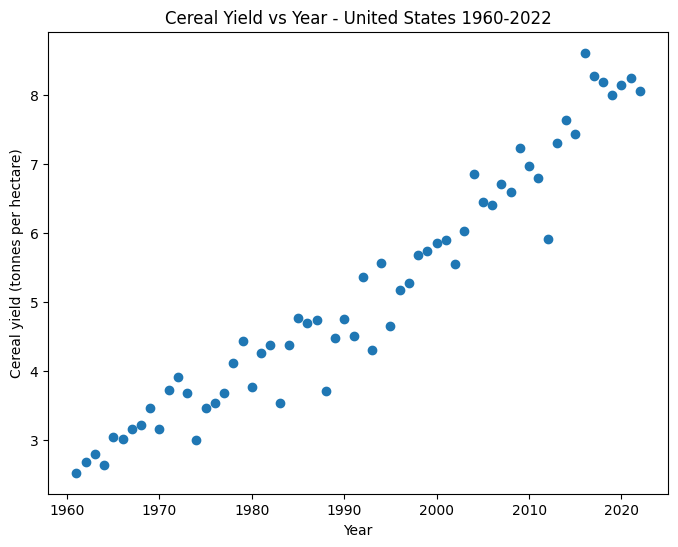

In [ ]:
# Plot USA data (yield vs. year)

plt.figure(figsize=(8, 6))
plt.scatter(
    usa_df["Year"],
    usa_df["yield_t_per_ha"]
)

plt.xlabel("Year")
plt.ylabel("Cereal yield (tonnes per hectare)")
plt.title("Cereal Yield vs Year - United States 1960-2022")
plt.show()

In [ ]:
# Calculate R-squared (to be added to the plot)
r2 = model.score(X, y)
r2

0.9365797223389376

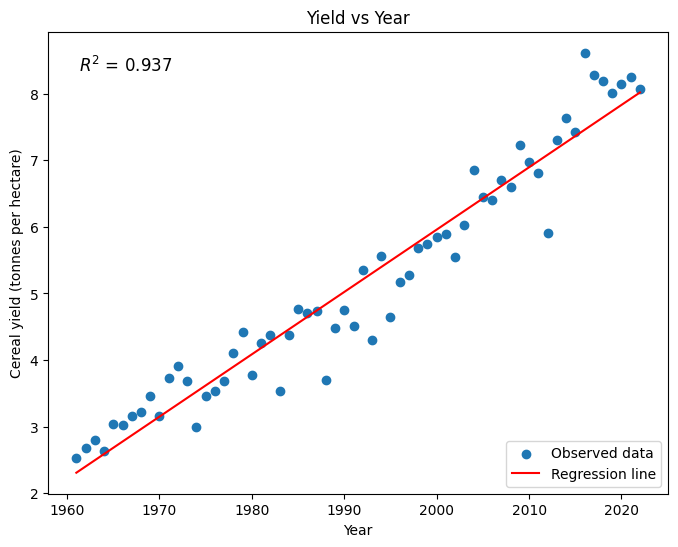

In [ ]:
# Plot regression line and scatter

plt.figure(figsize=(8, 6))

# Scatter plot of observed data
plt.scatter(X, y, label="Observed data")

# Regression line
plt.plot(X, model.predict(X), color="red", label="Regression line")

# Axis labels
plt.xlabel("Year")
plt.ylabel("Cereal yield (tonnes per hectare)")
plt.title("Yield vs Year")

# Add R-squared text to the plot
plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top"
)

plt.legend()
plt.show()


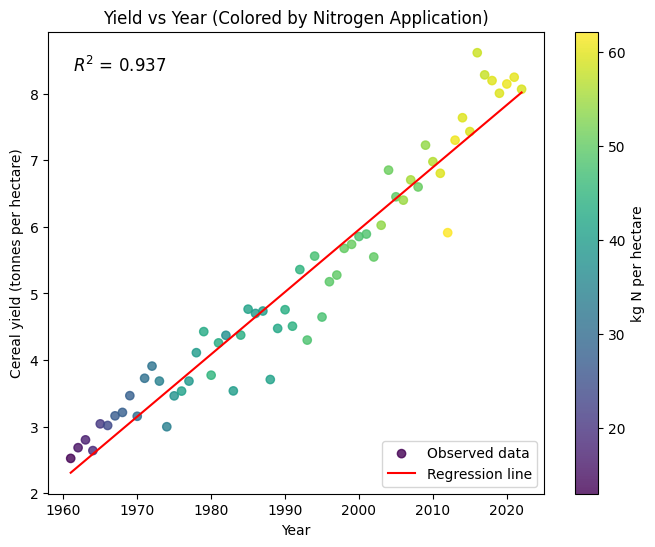

In [ ]:
# Plot regression line and scatter (colored by nitrogen application)

plt.figure(figsize=(8, 6))

# Scatter plot colored by nitrogen application
sc = plt.scatter(
    X,
    y,
    c=usa_df["nitrogen_kg_per_ha"],
    cmap="viridis",
    alpha=0.8,
    label="Observed data"
)

# Regression line
plt.plot(
    X,
    model.predict(X),
    color="red",
    label="Regression line"
)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Cereal yield (tonnes per hectare)")
plt.title("Yield vs Year (Colored by Nitrogen Application)")

# Add R-squared annotation
plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top"
)

# Colorbar for year
cbar = plt.colorbar(sc)
cbar.set_label("kg N per hectare")

plt.legend()
plt.show()


In [ ]:
# Define predictor variables
X_multi = usa_df[[
    "Year",
    "nitrogen_kg_per_ha"
]]

# Define response variable
y = usa_df["yield_t_per_ha"]

In [ ]:
# Build regression model
model_multi = LinearRegression()
model_multi.fit(X_multi, y)

LinearRegression()

In [ ]:
# Calculate coefficients
coef_df = pd.DataFrame({
    "Predictor": X_multi.columns,
    "Coefficient": model_multi.coef_
})

coef_df

,Predictor,Coefficient
0,Year,0.119599
1,nitrogen_kg_per_ha,-0.038575


In [ ]:
r2_simple = model.score(X, y)
r2_multi = model_multi.score(X_multi, y)

print("R² (Year only):", round(r2_simple, 3))
print("R² (Year + Nitrogen):", round(r2_multi, 3))

R² (Year only): 0.937
R² (Year + Nitrogen): 0.943


In [ ]:
# Set axes to be equal length
y_pred = model.predict(X)

min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())


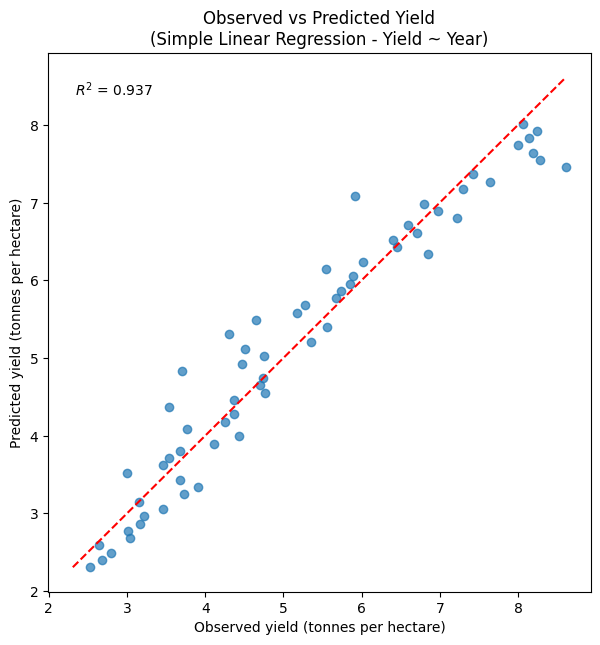

In [ ]:
# Predicted vs. Observed (without Nitrogen)
plt.figure(figsize=(7, 7))

plt.scatter(
    y,
    model.predict(X),
    alpha=0.7
)

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    color="red",
    linestyle="--"
)

plt.xlabel("Observed yield (tonnes per hectare)")
plt.ylabel("Predicted yield (tonnes per hectare)")
plt.title("Observed vs Predicted Yield\n(Simple Linear Regression - Yield ~ Year)")

plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2_simple:.3f}",
    transform=plt.gca().transAxes,
    verticalalignment="top"
)

plt.show()


In [ ]:
# Set axes to be equal length
y_pred = model_multi.predict(X_multi)

min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())

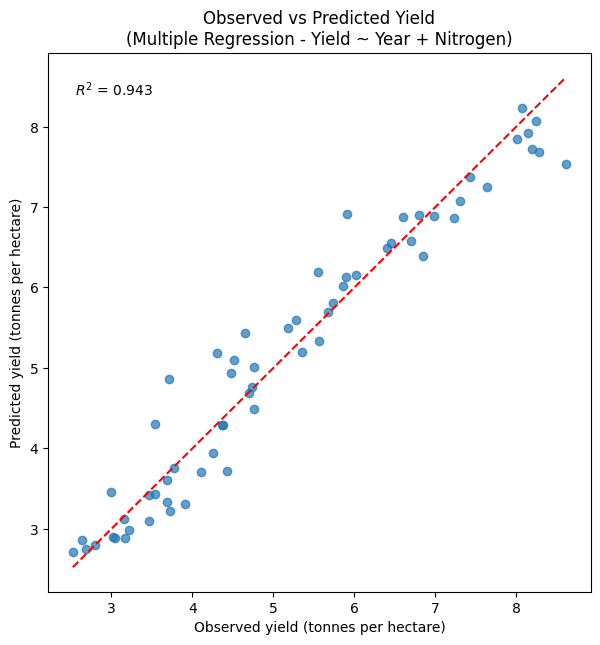

In [ ]:
# Predicted vs. Observed (with Nitrogen)
plt.figure(figsize=(7, 7))

plt.scatter(
    y,
    model_multi.predict(X_multi),
    alpha=0.7
)

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    color="red",
    linestyle="--"
)

plt.xlabel("Observed yield (tonnes per hectare)")
plt.ylabel("Predicted yield (tonnes per hectare)")
plt.title("Observed vs Predicted Yield\n(Multiple Regression - Yield ~ Year + Nitrogen)")

plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2_multi:.3f}",
    transform=plt.gca().transAxes,
    verticalalignment="top"
)

plt.show()


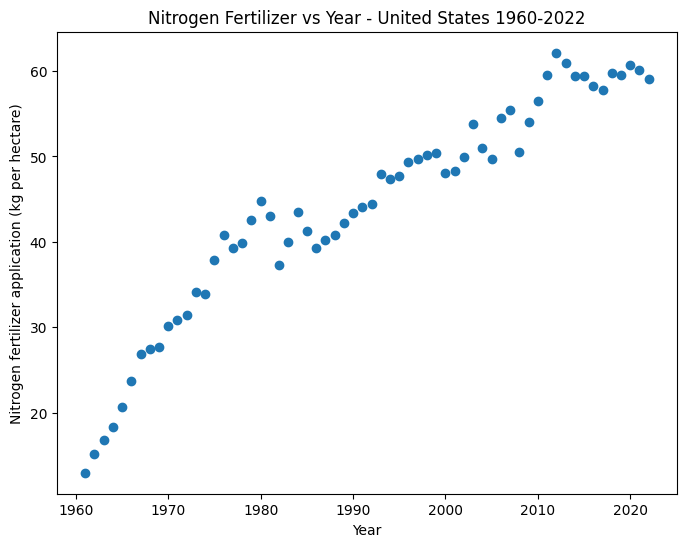

In [ ]:
# Plot USA data (nitrogen vs. year)

plt.figure(figsize=(8, 6))
plt.scatter(
    usa_df["Year"],
    usa_df["nitrogen_kg_per_ha"]
)

plt.xlabel("Year")
plt.ylabel("Nitrogen fertilizer application (kg per hectare)")
plt.title("Nitrogen Fertilizer vs Year - United States 1960-2022")
plt.show()

### **Data citation**

Food and Agriculture Organization of the United Nations (2025) – with major processing by Our World in Data. “Cereal yields – UN FAO” [dataset]. Food and Agriculture Organization of the United Nations, “Production: Crops and livestock products” [original data].

Food and Agriculture Organization of the United Nations (2025) – with major processing by Our World in Data. “Nitrogen fertilizer use per area of cropland – UN FAO” [dataset]. Food and Agriculture Organization of the United Nations, “Land, Inputs and Sustainability: Fertilizers by Nutrient” [original data].